#                ONLINE SHOPPERS PURCHASING INTENTION 

______________________________________________________________________________________________________________________________________________________________________________________ 

**Name:** ANILA K


**Organization:** Entri Elevate


**Date:** 


—--------------------------------------------------------------------------------------------------------—--------------------------------------------------------------------------------



### **Table of Content**

1. Overview of Problem statement 
2. Objective 
3. Data description
4. Data collection
5. Data preprocessing-Data cleaning
6. Exploratory Data Analysis (EDA):
7. Feature Engineering:
8. Feature Selection:
9. Feature scaling
10. Split Data into Training and Testing Sets
11. Build the ML Model.(at least 5)
12. Model Evaluation.
13. Hyperparameter Tuning and  pipeline
14. Save the Model.
15. Test with Unseen Data.
16. Interpretation of Results (Conclusion).
17. Future Work.





### 1.  **Overview of Problem Statement:**


With the increasing use of internet services, mobile devices, and secure payment gateways, online shopping has become a preferred method for consumers worldwide. Shoppers now have instant access to a wide variety of products, competitive pricing, and seamless checkout experiences, making e-commerce platforms a crucial part of modern retail.

### 2. **Objective:**


To analyze user behavior on an e-commerce website and predict whether a visitor is likely to make a purchase based on their session interactions.

### 3. **Data Description:**


#### ➤ **Source**: UCI Machine Learning Repository


 #### ➤ **Features:**
1. **Administrative** -  Number of different types of administartive pages visited by the visitor in that session
2. **Administrative Duration** - Total time spent in administrative 14. Browserpage categories.
3. **Informational** -  Number of different types of informational pages visited by the visitor in that session
4. **Informational Duration** - Total time spent in informational page categories.
5. **Product Related** -  Number of different types of product related pages visited by the visitor in that session
6. **Product Related Duration** - Total time spent in Product Related page categories.
7. **Bounce Rate** - Percentage of users who left after viewing only one page.
8. **Exit Rate** - Percentage of pageviews where the visitor exited the website.
9. **Page Value** - Average value assigned to a page
10. **Special Day**	- Proximity to a special day (e.g., 1 on peak shopping day, 0 otherwise).
11. **Month** - Month of the session (e.g., Jan, Feb, ..., Dec).
12. **Weekend**	- Whether the session occurred on a weekend (1 = Yes, 0 = No).
13. **Operating System** - OS used by the visitor (e.g., Windows, Mac, Linux).
14. **Browser** - Web browser used (e.g., Chrome, Firefox, Safari).
15. **Region** - Geographic region of the user.
16. **Traffic Type** - Source of website traffic (e.g., Organic Search, Direct, Referral).
17. **Visitor Type** - Type of visitor (New Visitor, Returning Visitor, Other).

     **Target Variable**
19. **Revenue**	- Whether the user completed a purchase (1 = Yes, 0 = No).



 ### 4. **Data Collection:**


In [1]:
# Install & Import Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the Dataset

df = pd.read_csv("online_shoppers_intention.csv")  


*Essential libraries have been imported and the datet have been loaded successfully.*

In [6]:
# View the first 5 rows

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# View the last 5 rows


df.tail()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


*Displayed the first and last five rows to understand the data structure and distribution.*

In [12]:
# Check dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

*Numerical data and categorical data can be distinguished using info() function.*

In [15]:
# Number of features in the Dataset

df.shape

(12330, 18)

*12330 rows and 18 columns are  there in the dataset.*


In [18]:
#Columns in the Dataset

df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

*18 columns with names have been displayed.*

In [21]:
# Index of a Dataframe

df.index

RangeIndex(start=0, stop=12330, step=1)

In [24]:
# Summary statistics

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [309]:
df.mode()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,Mar,1.0,1.0,1.0,1.0,Returning_Visitor,False,True
1,NaN,NaN,NaN,NaN,33.0,0.300000,0.2,0.023333,1.000000,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.800000,NaN,0.100000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,6.346700,NaN,0.200000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,7.332146,NaN,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,9.343250,NaN,3.213000,29.356298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,77.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,404.121000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Mean,Median and Mode are displayed here. from the result we can see that outliers are present in the dataset.*

In [27]:
# Check Datatype of the dataset

print(df.dtypes)


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [30]:
# Check for missing values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

*Dataset doesnot have missing values so no imputation is needed.*

*If missing values were present, we could replace them using mean/median imputation.*

In [34]:
# Display Numerical Data

num_data= df.select_dtypes(include="number")

num_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [36]:
#check missing values

num_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

In [38]:
#list out numeric columns

numeric_column = list(num_data)
numeric_column

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [40]:
# check skewness

num_data.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
dtype: float64

➡ ***The .skew() function in pandas is used to measure the asymmetry of the distribution of numerical data.***

➡ ***It helps identify whether the data is normally distributed, positively skewed, or negatively skewed.***

        • Highly Skewed Columns (> 2 or < -2): Administrative_Duration (5.59), Informational_Duration (7.54), ProductRelated_Duration (7.25),
        PageValues (6.35)

        • Moderately Right-Skewed (0.5 - 2.0):  Region (0.97), TrafficType (1.95), Weekend (1.25), Month_May (1.02), Month_Nov (1.19), Month_Mar (1.93),Revenue (1.89)

        •Left-Skewed (< 0): VisitorType_Returning_Visitor (-2.01)

➡ ***Skewness and outliers are closely related because high skewness often indicates the presence of outliers.***

In [43]:
# Display categorical datas

cat_data = df.select_dtypes(include="object")
cat_data

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


In [45]:
#check missing values in categorical data

cat_data.isnull().sum()

Month          0
VisitorType    0
dtype: int64

In [47]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [50]:
# Find the dupilcate

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

In [52]:
df.duplicated().sum()


125

In [55]:
# Remove the duplicates

df.drop_duplicates(inplace=True)


In [57]:
df.duplicated().sum()


0

#### *Number of unique (distinct) values**

In [59]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

### 5. **Data Preprocessing - Data Cleaning:**


#### ***• Finding outliers***

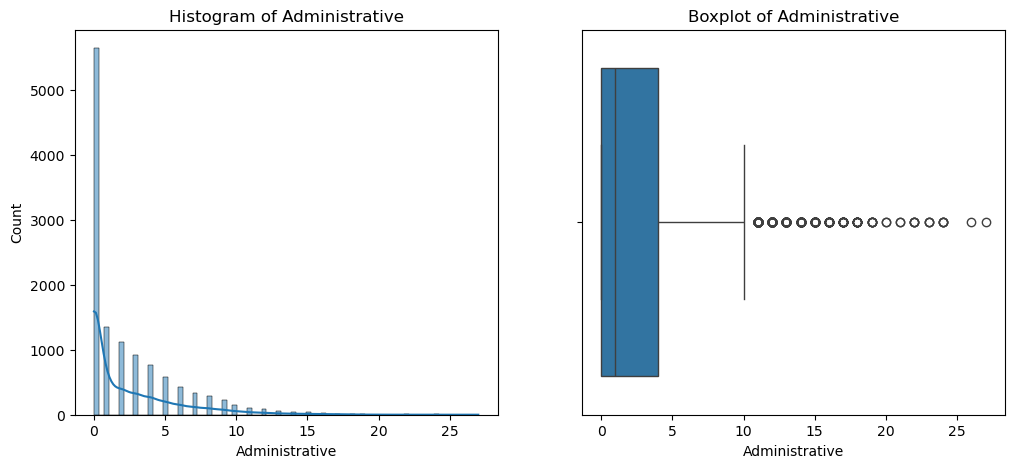

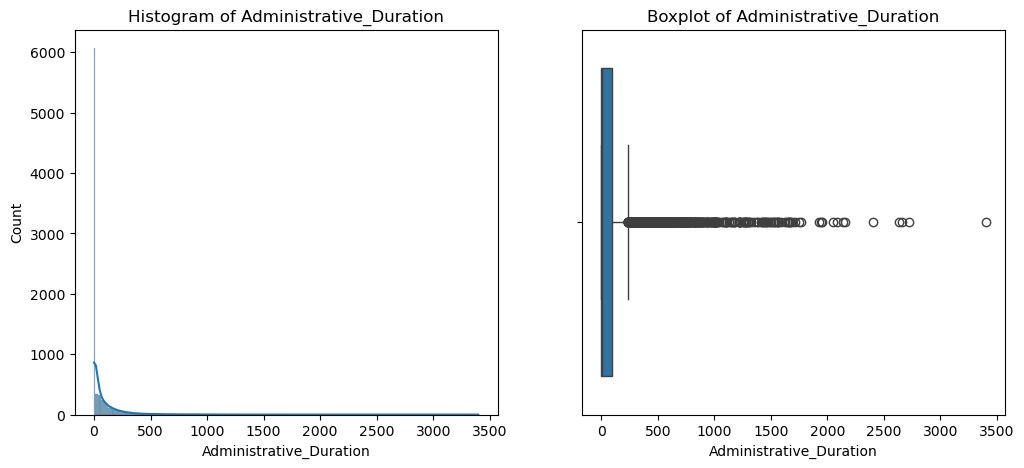

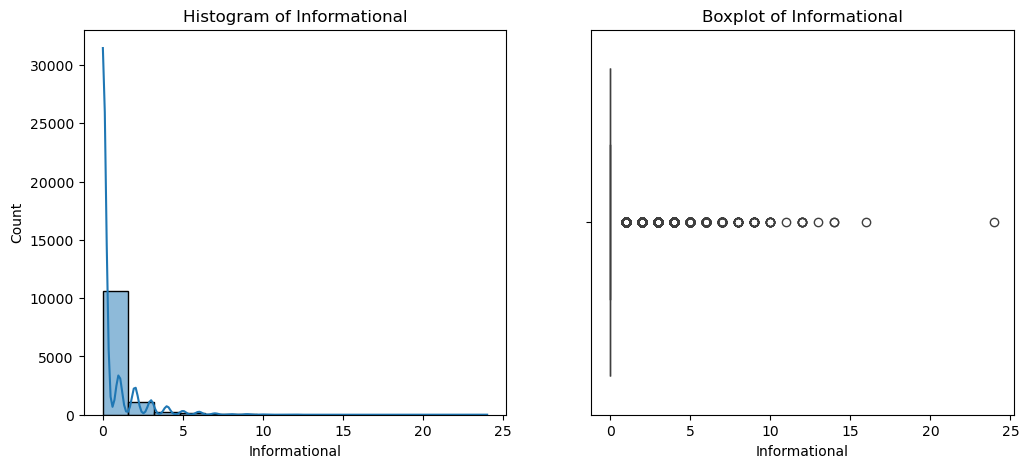

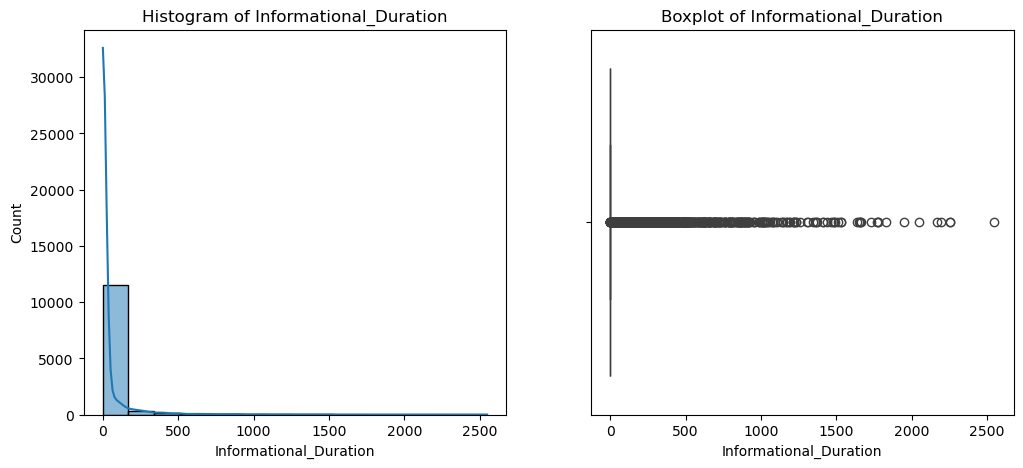

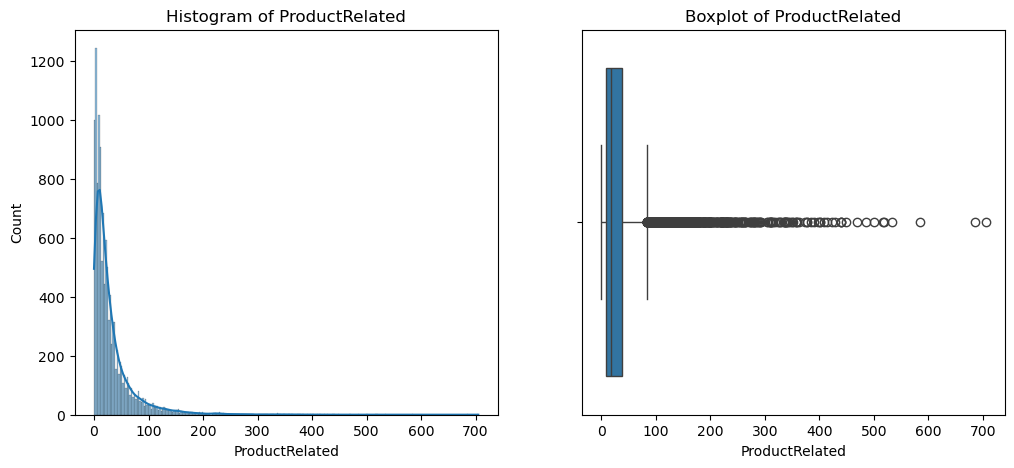

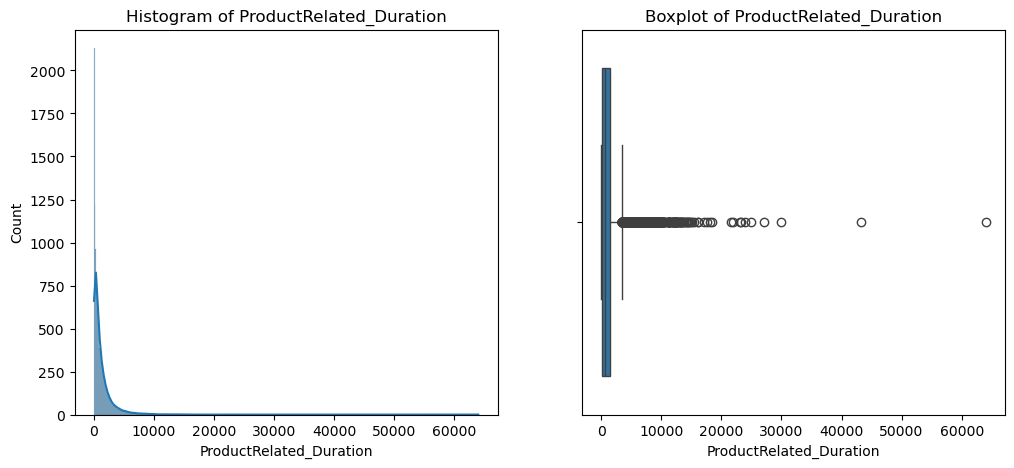

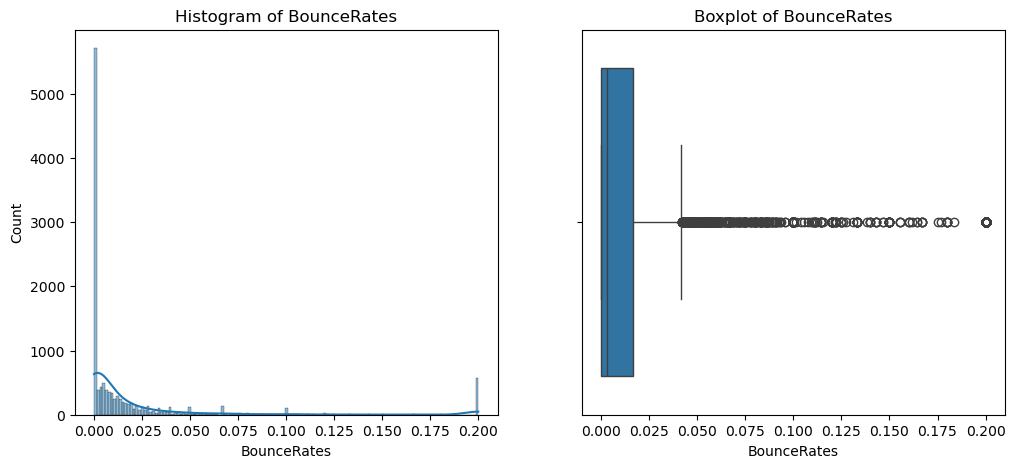

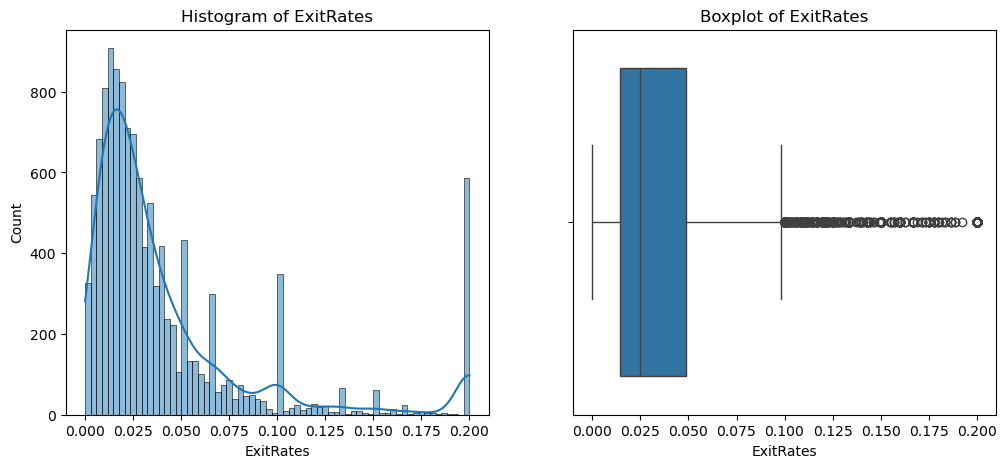

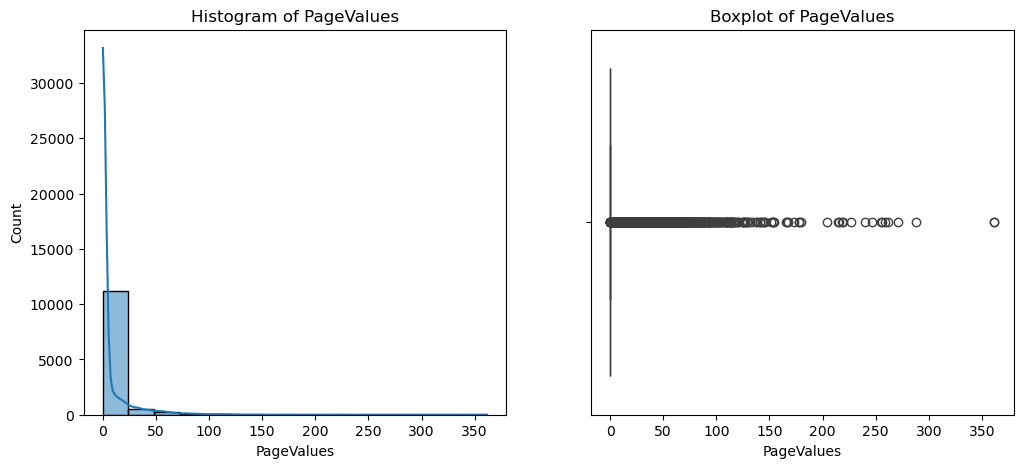

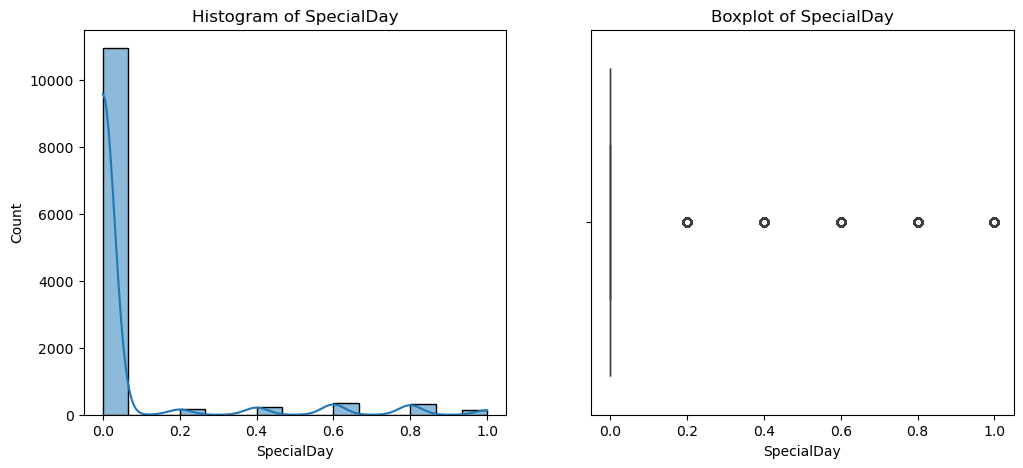

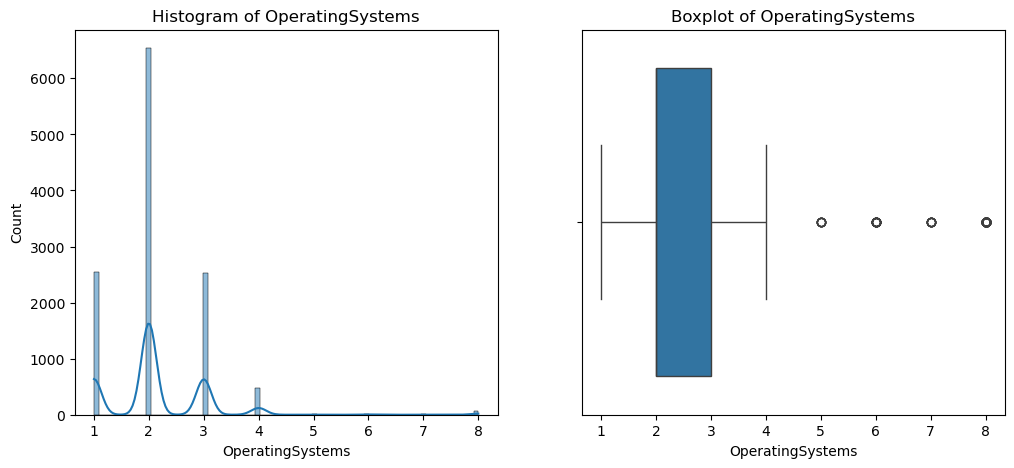

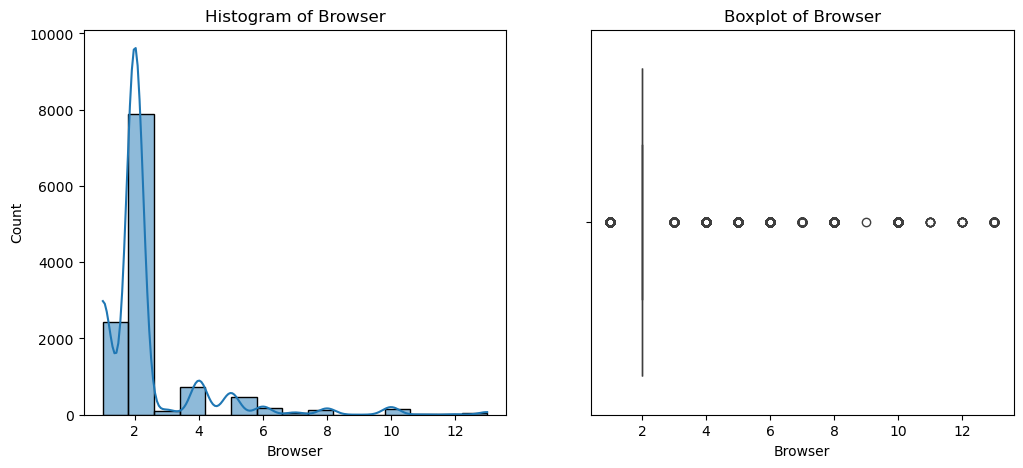

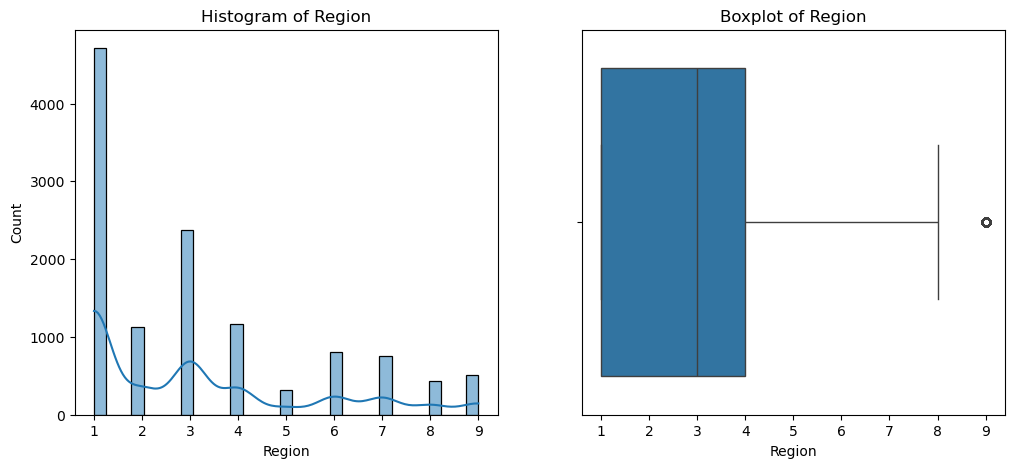

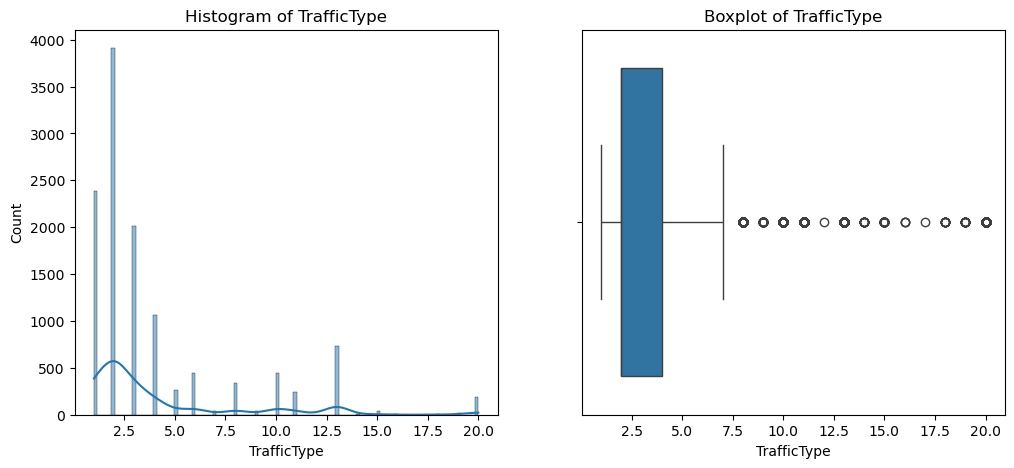

In [64]:
# Graph to Detect Outliers 

for column in numeric_column:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

*Outliers are data points that are very different from the rest of the values in a column — they’re unusually high or low compared to most of the data.*

*From the above Boxplots, we can understnd that outliers are present in the dataset.*

In [65]:
# Select relevant columns
cols = [ "Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates",
           "ExitRates","PageValues","SpecialDay","OperatingSystems","Browser","Region","TrafficType"]
columns = df[cols]

# Calculate Q1, Q3, and IQR

Q1 = columns.quantile(0.25)
Q3 = columns.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds

w1=Q1 - 1.5 * IQR
w2=Q3 + 1.5 * IQR

# Identify outlier rows

outliers = ((columns< (w1)) | (columns > (w2))).any(axis=1)
#

print("\nOutliers detected in rows:")
print(outliers.value_counts())

    


Outliers detected in rows:
True     9746
False    2459
Name: count, dtype: int64


*IQR stands for Interquartile Range. It measures the spread of the middle 50% of your data.*

*Q1 = 25th percentile (first quartile)*

*Q3 = 75th percentile (third quartile)*

*IQR = Q3 - Q1*

*This range captures the bulk of your data. Anything far outside this range may be considered an outlier.*

***Here 9746 rows contain outliers. 
We can use Capping method to handle the outliers.***

***Capping Method***


In [68]:

def cap_outliers(df, columns, lower_q=0.05, upper_q=0.95):
    df_capped = df.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_q)
        upper = df_capped[col].quantile(upper_q)
        df_capped[col] = np.clip(df_capped[col], lower, upper)
    return df_capped

df_capped = cap_outliers(df, numeric_column)
print(f"Capped outliers using 5th–95th percentiles.")

Capped outliers using 5th–95th percentiles.


*The capping method (also known as winsorization) is a technique used in data preprocessing to handle outliers.*

*Instead of removing extreme values (which might result in loss of data), the capping method limits or "caps" the values at a certain threshold.*

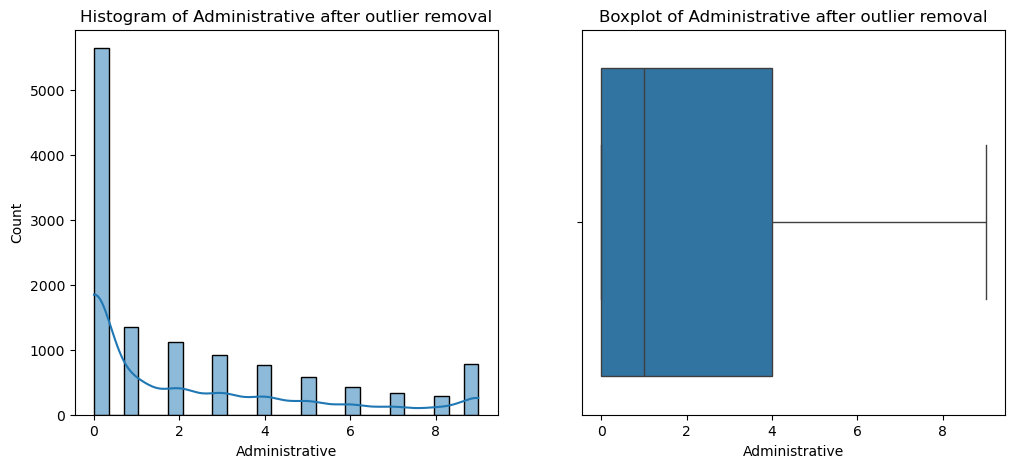

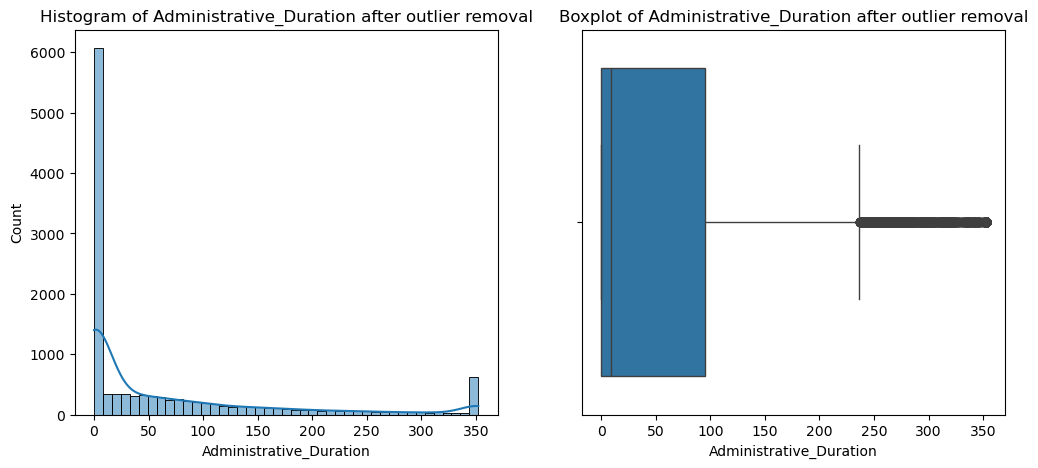

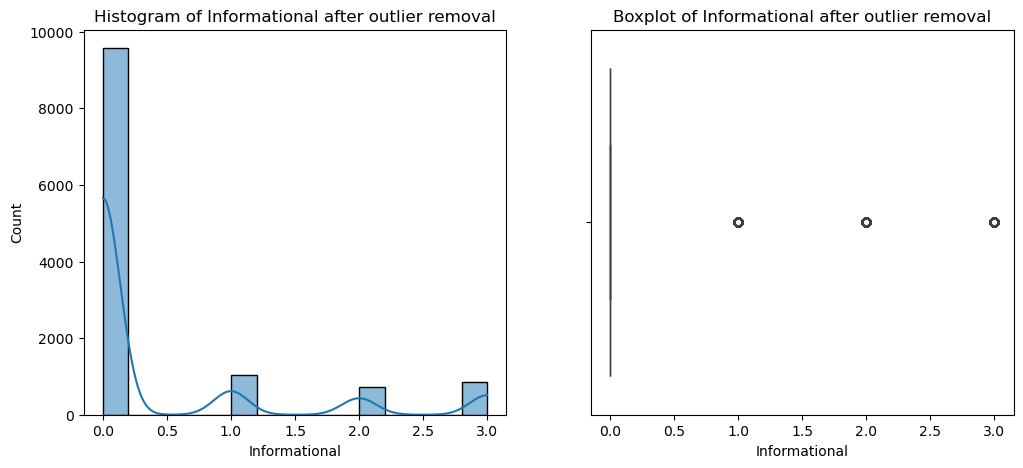

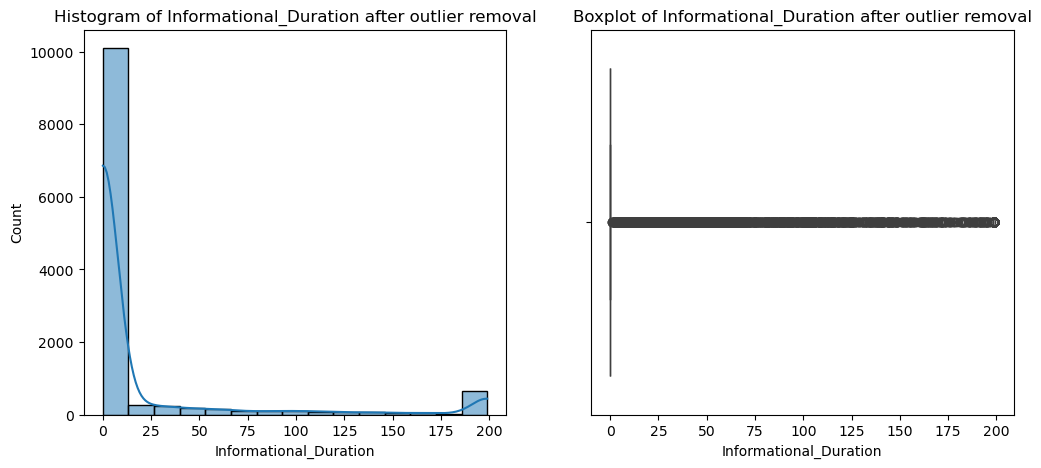

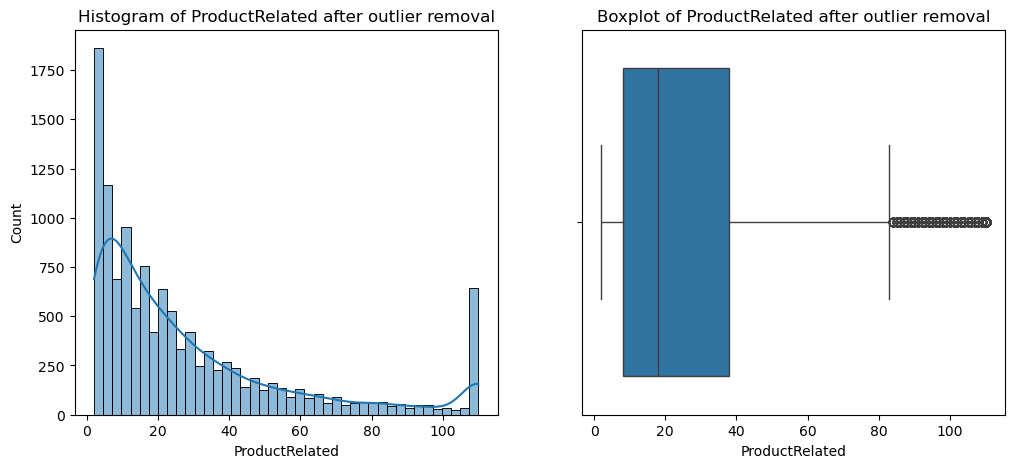

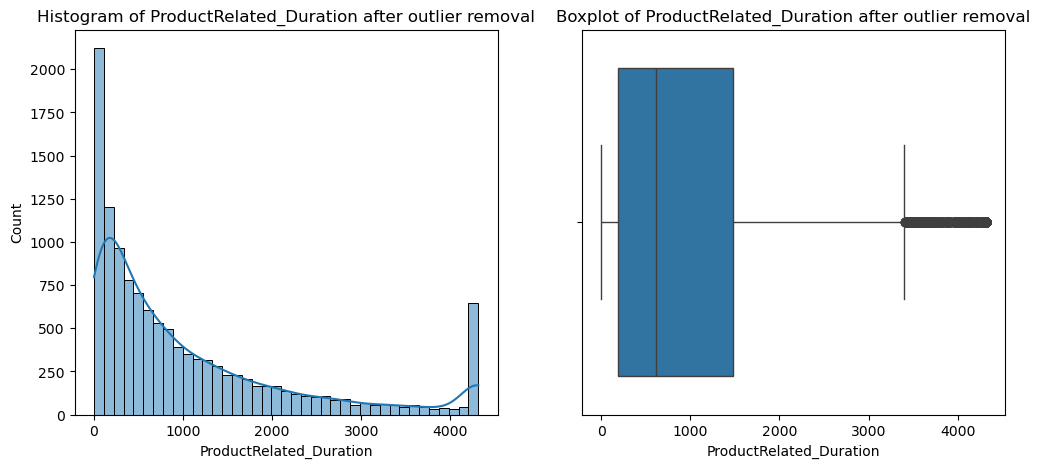

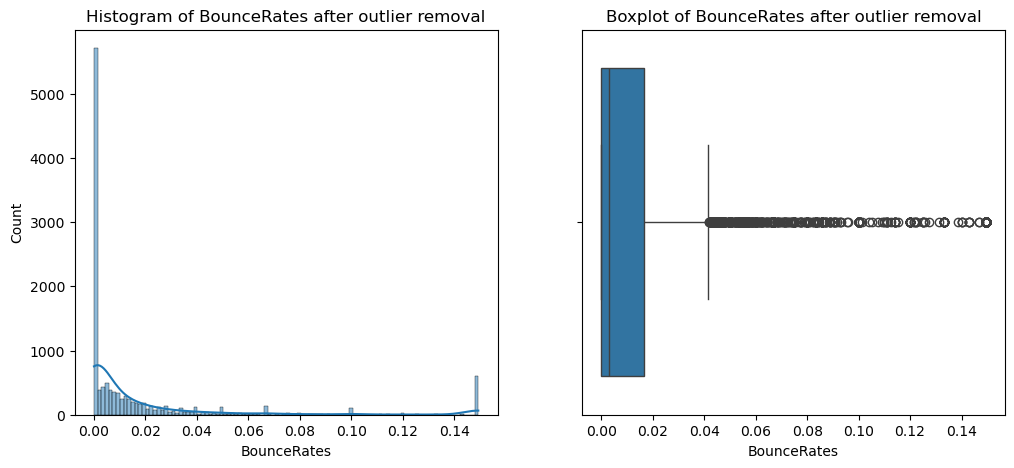

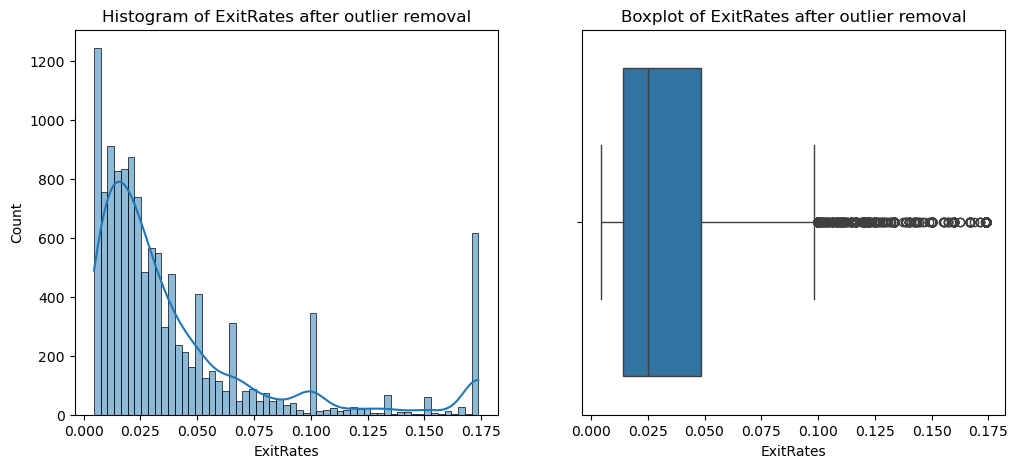

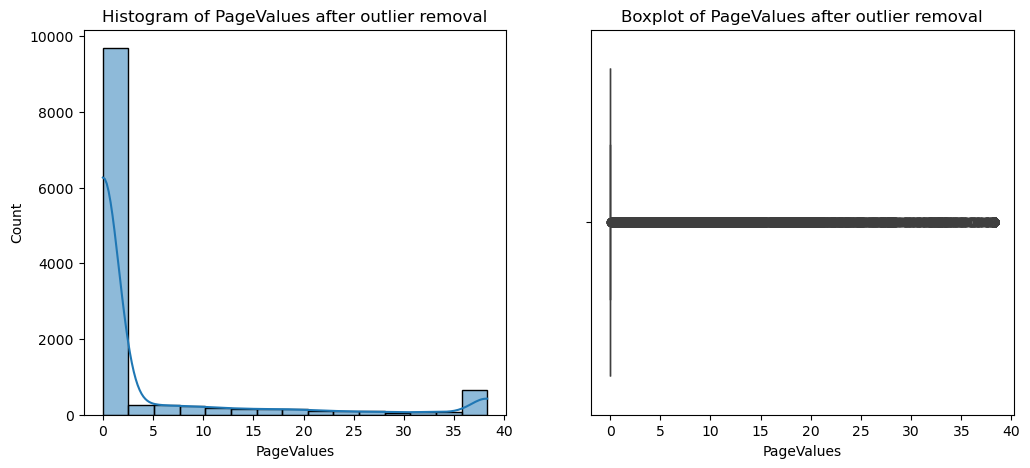

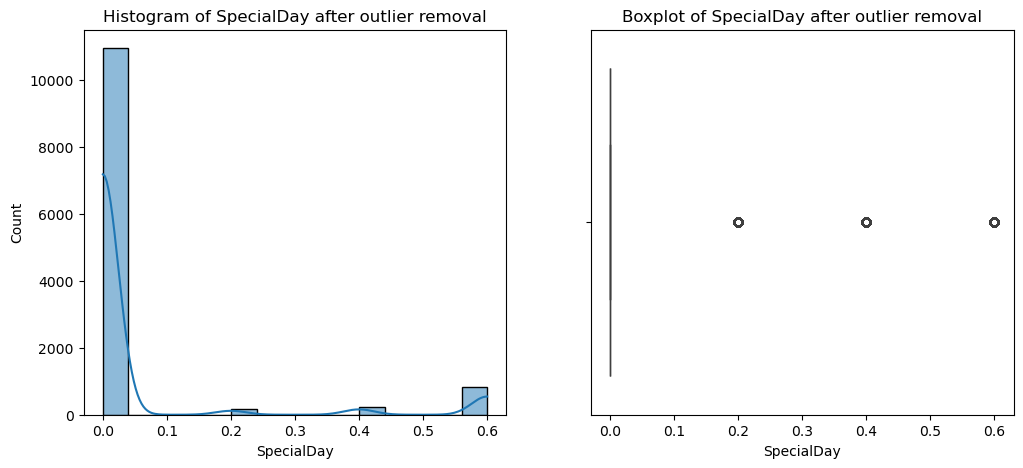

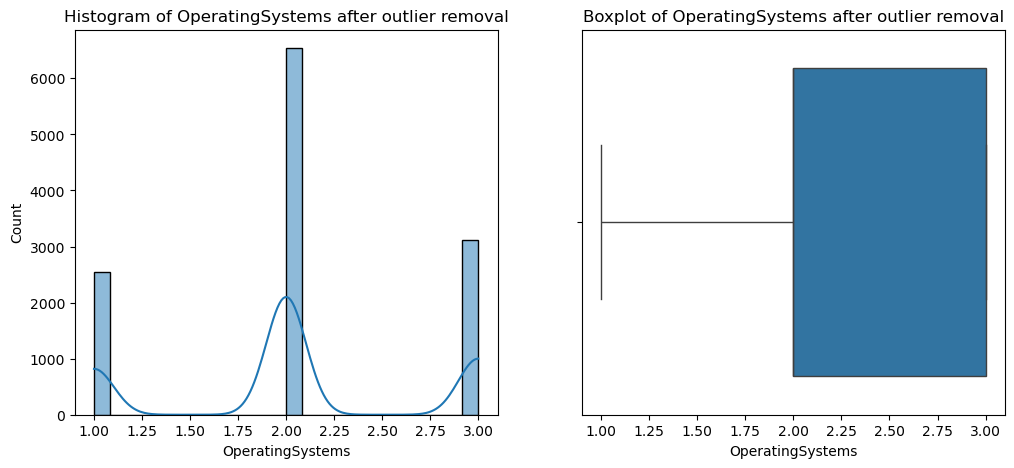

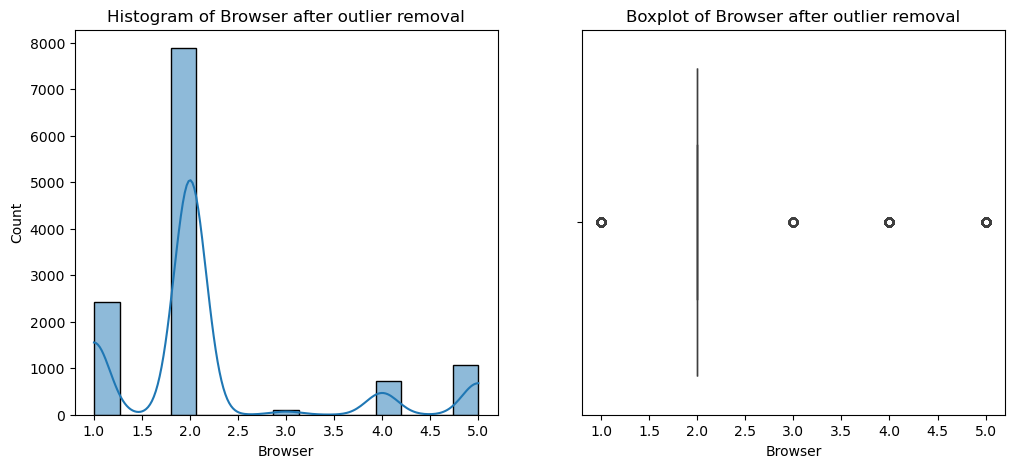

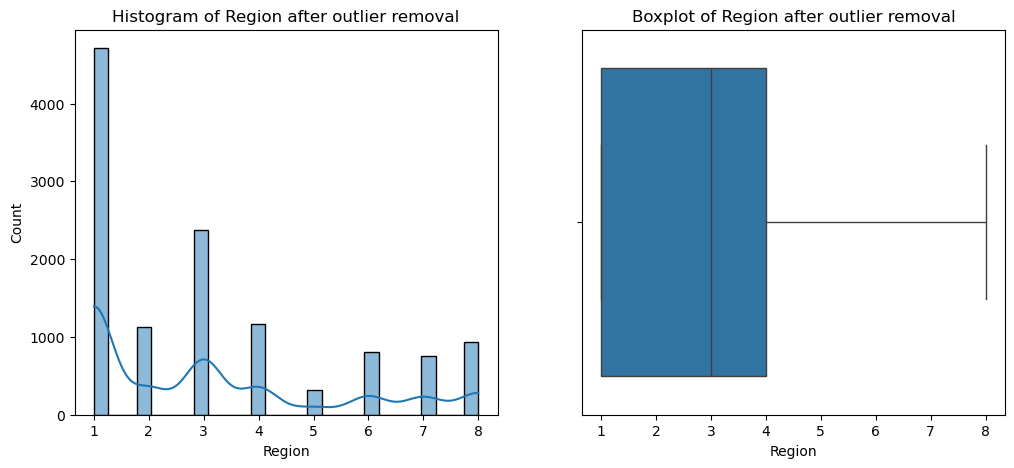

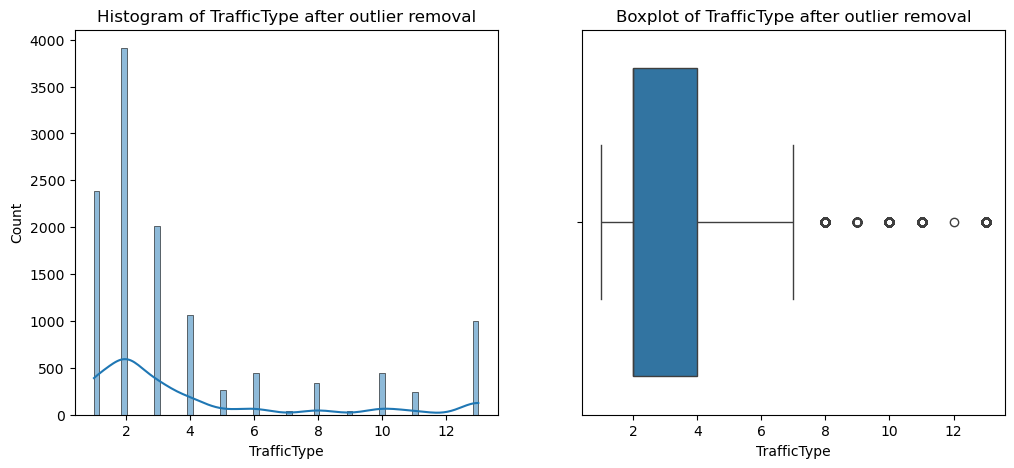

In [69]:
#checking outliers after capping using boxplot and histogram

for column in cols:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_capped[column],kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column} after outlier removal')

*Outliers are removed using the capping method*

In [80]:
# Print the new shape 

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_capped.shape)


Original dataset shape: (12205, 18)
Cleaned dataset shape: (12205, 18)


In [82]:
#checking skewness after handling outlier

df_capped[numeric_column].skew()


Administrative             1.194492
Administrative_Duration    1.681086
Informational              2.030582
Informational_Duration     2.796893
ProductRelated             1.503052
ProductRelated_Duration    1.476022
BounceRates                2.753482
ExitRates                  1.984381
PageValues                 2.450467
SpecialDay                 2.931270
OperatingSystems          -0.057308
Browser                    1.495652
Region                     0.867654
TrafficType                1.544710
dtype: float64

##### ➡ Skewness reduced after removing the outliers

***Data preprocessing is over.***

#### **5. Exploratory Data Analysis (EDA):**


#### •Histogram (Distribution of Features)


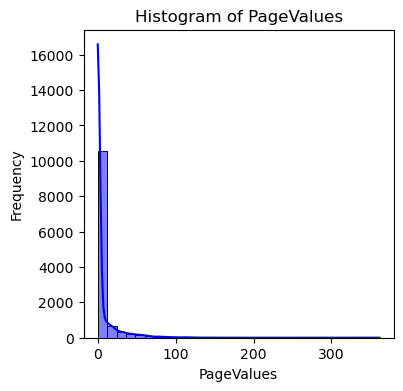

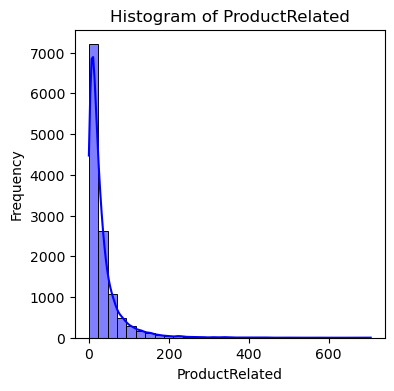

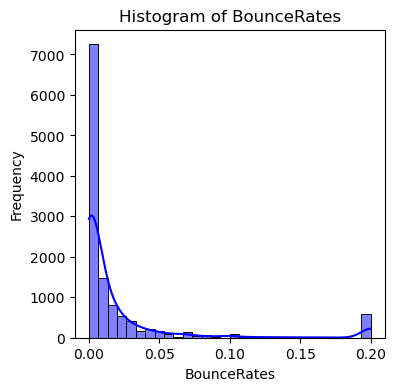

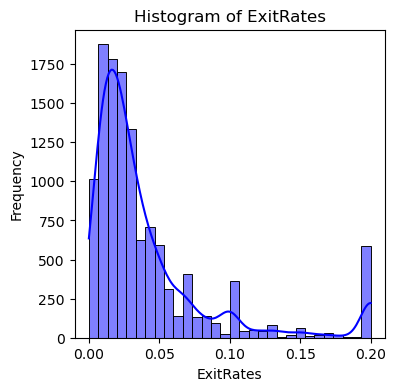

In [88]:
columns = ["PageValues", "ProductRelated", "BounceRates", "ExitRates"]  

for col in columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

*Results*

*→Most of the users don’t interact with high-value pages.*

*→Most of users are just browsing a few items or not exploring deeply into product content.*

*→Most of users have very low bounce rates, indicating they are exploring beyond the landing page.*

*→ Repeated high exit rates*  





#### 🔹 Heatmap (For Correlation Analysis)


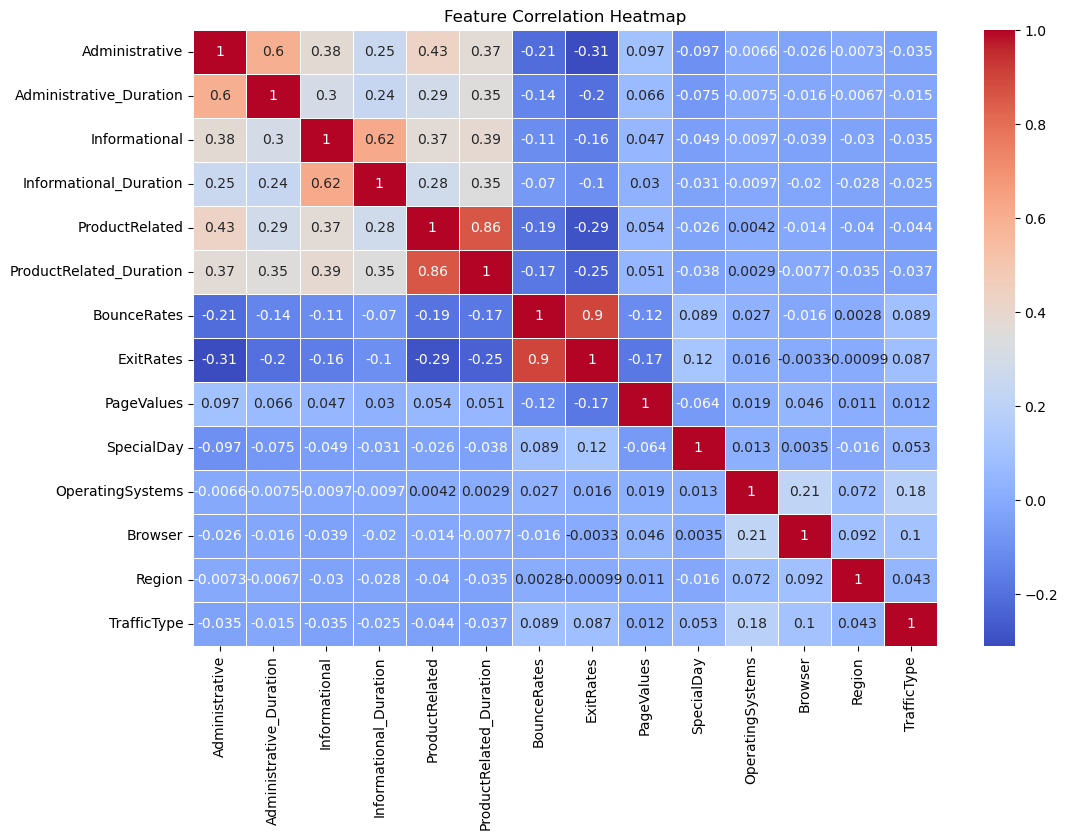

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_column].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

🔹***Pie Chart (For Categorical Features)***


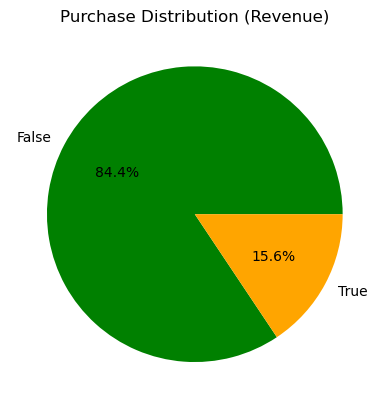

In [95]:
df["Revenue"].value_counts().plot.pie(autopct="%1.1f%%", colors=["Green", "orange"])
plt.title("Purchase Distribution (Revenue)")
plt.ylabel("")
plt.show()

*Pie chart represents the Purchase Distribution based on the Revenue feature, which is a classic binary classification (0 = No Purchase, 1 = Purchase)*.

Result-

*→84.4% of sessions did not result in a purchase.*

*→Only 15.6% of sessions converted into purchases.*



#### ***🔹 Bar Plot (For Categorical Counts)***


C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\2633566558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')  # or any other categorical column


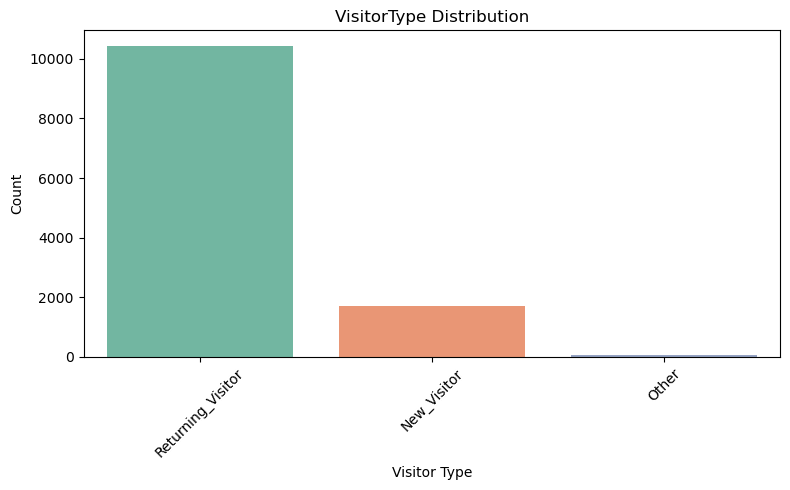

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='VisitorType', palette='Set2')  # or any other categorical column
plt.title('VisitorType Distribution')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate if long category names
plt.tight_layout()
plt.show()

#### 🔹 ***Count Plot (For Session Activity)***


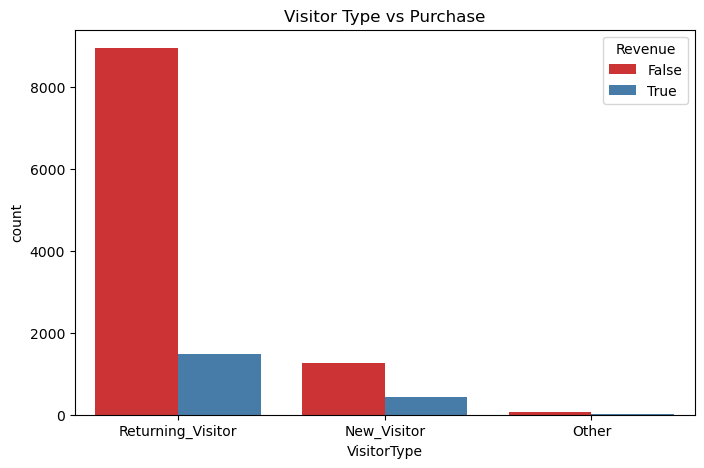

In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(x="VisitorType", hue="Revenue", data=df, palette="Set1")
plt.title("Visitor Type vs Purchase")
plt.show()


#### 🔹***Line Plot (For Trend Analysis)***


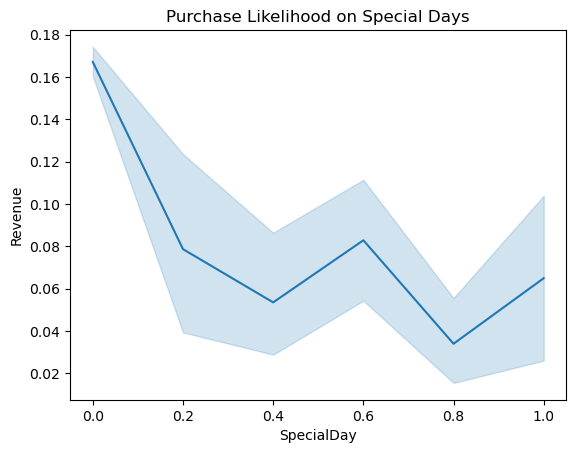

In [105]:
sns.lineplot(x="SpecialDay", y="Revenue", data=df)
plt.title("Purchase Likelihood on Special Days")
plt.show()

 #### •***Pair Plot (Relationships Between Features)***


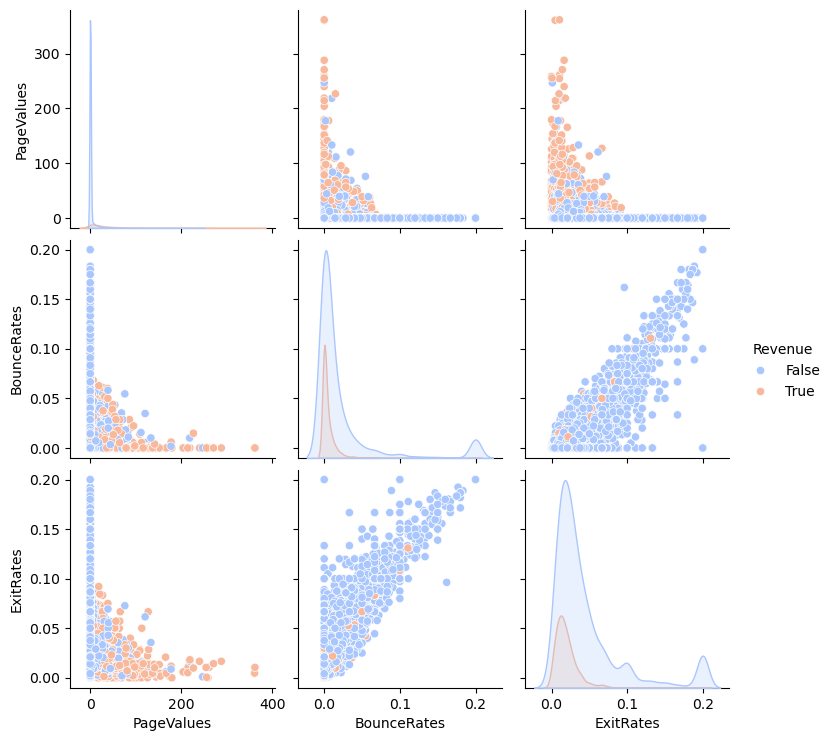

In [107]:
sns.pairplot(df[["PageValues", "BounceRates", "ExitRates", "Revenue"]], hue="Revenue", palette="coolwarm")
plt.show()

#### ***• Kernel Density Estimation (KDE)***


C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3721008453.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color="purple")


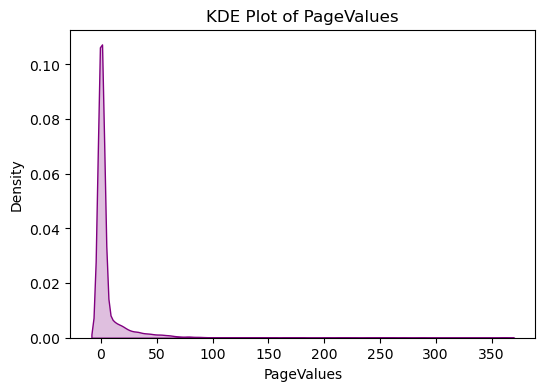

C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3721008453.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color="purple")


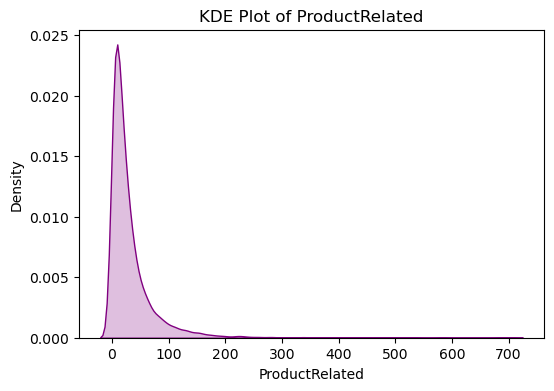

C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3721008453.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color="purple")


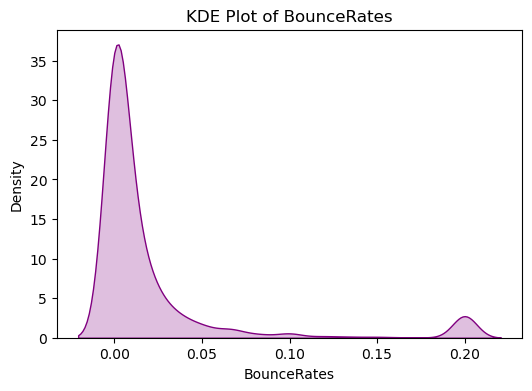

C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3721008453.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color="purple")


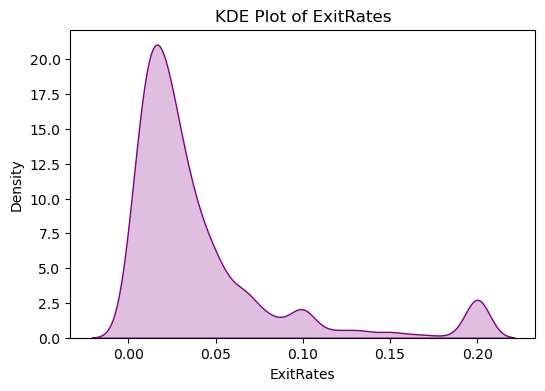

In [111]:
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], shade=True, color="purple")
    plt.title(f"KDE Plot of {col}")
    plt.show()

7. ***Feature Engineering:***


In [114]:
#find the datatypes
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [116]:
Cat_columns = df.select_dtypes(include=['object']).columns
Num_columns = df.select_dtypes(include=['int64','float64']).columns

print("\n Number of Categorical Columns are : ", len(Cat_columns))
print("\n Number of Numerical Columns are : ", len(Num_columns))




 Number of Categorical Columns are :  2

 Number of Numerical Columns are :  14


***➡ Many machine learning models cannot work with Boolean values directly.***

***➡ So Boolean to Numeric Conversion should be done.***


In [119]:
df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
df['Revenue'] = df['Revenue'].replace({True: 1, False: 0})

C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3704027326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\3704027326.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Revenue'] = df['Revenue'].replace({True: 1, False: 0})


In [121]:
df["Weekend"].head()

0    0
1    0
2    0
3    0
4    1
Name: Weekend, dtype: int64

In [123]:
df["Revenue"].head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [330]:
#convert categorical column in to numerical

df = pd.get_dummies(df, columns=["Month","VisitorType"], dtype=int)

print("One-Hot Encoding applied. Updated DataFrame:\n", df.head())



One-Hot Encoding applied. Updated DataFrame:
    Administrative  Administrative_Duration  Informational  \
0               0                        1              1   
1               2                        1              1   
2               3                        4             22   
3               1                       33              0   
4               5                       45              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       1               0                  0.30000   
1                       2               1                  1.80000   
2                      11             110                 77.33000   
3                      26              33                 31.00000   
4                       7               6                  9.34325   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0        0.200        0.1         1.0         0.0               2.0      2.0   
1     

In [332]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Feb,Month_Mar,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,1,1,1,0,0.300000,0.200,0.100000,1.000000,0.0,2.0,2.0,2.0,1.0,False,True,0,1,1,0
1,2,1,1,2,1,1.800000,0.000,0.000000,2.000000,0.0,1.0,1.0,1.0,1.0,False,True,0,0,0,1
2,3,4,22,11,110,77.330000,5.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,0,0,0,1
3,1,33,0,26,33,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,0,0,0,1
4,5,45,1,7,6,9.343250,8.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,1,0
5,0,0,0,0,1,0.000000,0.200,0.200000,0.000000,0.0,1.0,1.0,1.0,1.0,False,False,1,0,0,1
6,4,44,0,9,35,404.121000,88.000,3.213000,4.000000,0.0,2.0,2.0,2.0,1.0,False,True,0,1,0,1
7,7,69,0,0,33,7.332146,1.100,0.023333,29.356298,0.0,2.0,2.0,1.0,3.0,False,True,0,1,0,1
8,0,11,0,59,62,6.346700,0.000,2.000000,5.000000,0.0,1.0,1.0,1.0,3.0,True,False,0,1,1,0


#### 8. **Feature Selection:**


***➡ Removes irrelevant/redundant features.***

***➡ Reduces overfitting and improves model accuracy.***

***➡ Speeds up model training time.***

***➡ Here we use SelectKBest Feature***


In [130]:
# Define features (X) and target (y)

X = df.drop(columns=['Revenue'])
y = df['Revenue']


In [132]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [134]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12205, dtype: int64

In [136]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 10  

selector = SelectKBest(score_func=f_classif, k=k)

X_new = selector.fit_transform(X, y)


selected_features = X.columns[selector.get_support()]

print("Top", k, "Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['Administrative', 'Informational', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month_Nov', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')


#### 9.  **Feature Scaling:**


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


object= StandardScaler()
X_scale = object.fit_transform(X)

#### 10. **Split Data into Training and Testing Sets:**


In [142]:
X_scale

array([[-0.70230237, -0.46001931, -0.3988242 , ..., -0.40131538,
        -0.08173716,  0.41239542],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.40131538,
        -0.08173716,  0.41239542],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.40131538,
        -0.08173716,  0.41239542],
       ...,
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.40131538,
        -0.08173716,  0.41239542],
       [ 0.49879066, -0.03744737, -0.3988242 , ..., -0.40131538,
        -0.08173716,  0.41239542],
       [-0.70230237, -0.46001931, -0.3988242 , ...,  2.49180583,
        -0.08173716, -2.42485718]])

• Train-Test Split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (9764, 28)
X_test :  (2441, 28)
y_train :  (9764,)
y_test :  (2441,)


In [232]:
# Checking Class imbalance of the target variable

df_capped['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

In [234]:
#Calculate Class Imbalance Ratio

Max_cls = df_capped['Revenue'].value_counts().max()
Min_cls = df_capped['Revenue'].value_counts().min()
ratio = Max_cls/Min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 5.40


Based on the Class Imbalance ratio,it is showing high imbalance ,So SMOTE or ADASYN should be used to balance the dataset.

Here we use SMOTE for the balancing of the dataset.

In [240]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled.value_counts())

Original class distribution:
 Revenue
0    10297
1     1908
Name: count, dtype: int64
Resampled class distribution:
 Revenue
0    10297
1    10297
Name: count, dtype: int64


*Now the dataset is balanced, which helps the model learn patterns in both classes equally*

#### 11. **Build the ML Model**

 1. **Logistic Regression** - Models the probability that a sample belongs to a class using a sigmoid function.
    
 2. **Support Vector Machine (SVM)**- Finds the best hyperplane that separates classes with the maximum margin.

 3. **Decision Tree** - Splits the dataset into branches based on feature values until it reaches a decision (leaf).

 4. **MLP Classifier (Multi-Layer Perceptron)**- A type of neural network with multiple layers and nonlinear activation functions.
 
 5. **Naive Bayes** - Based on Bayes’ Theorem, assumes all features are independent.

 6. **Random Forest**- Combines many decision trees (ensemble) to make a stronger, more stable model.

 7. **K-Nearest Neighbors (KNN)**- Classifies a point based on the majority class of its ‘k’ closest neighbors.

 8. **Gradient Boosting** - Builds trees one by one, each correcting the previous one’s errors.

 9. **AdaBoost (Adaptive Boosting)**- Focuses more on incorrectly classified points by giving them more weight in the next round.

In [242]:
#importing required libraries for the model implementation

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [244]:
#Initialize models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}


C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.8886
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2059
           1       0.77      0.41      0.54       382

    accuracy                           0.89      2441
   macro avg       0.83      0.69      0.74      2441
weighted avg       0.88      0.89      0.87      2441


SVM Performance:
Accuracy: 0.8460
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2059
           1       1.00      0.02      0.03       382

    accuracy                           0.85      2441
   macro avg       0.92      0.51      0.47      2441
weighted avg       0.87      0.85      0.78      2441


Decision Tree Performance:
Accuracy: 0.8611
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2059
           1       0.55      0.59      0.57       382

    accuracy                           0.86      24

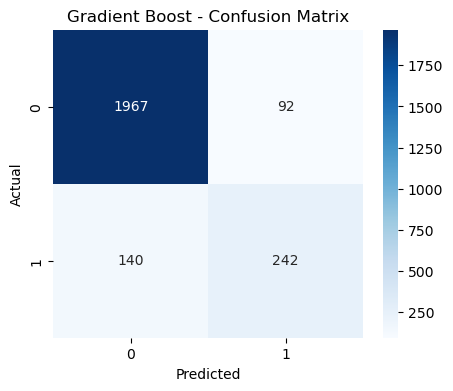

In [246]:
# Train and Evaluate Models

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    tr_acc = model.score(X_train, y_train)
    results.append({"Model": name, "Accuracy": acc, "Train Accuracy": tr_acc})

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [250]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                 Model  Accuracy  Train Accuracy
5       Gradient Boost  0.904957        0.918271
3        Random Forest  0.901270        1.000000
0  Logistic Regression  0.888570        0.882323
2        Decision Tree  0.861122        1.000000
4  K-Nearest Neighbors  0.856616        0.894613
1                  SVM  0.845965        0.846272


In [252]:
results_df

,Model,Accuracy,Train Accuracy
5,Gradient Boost,0.904957,0.918271
3,Random Forest,0.901270,1.000000
0,Logistic Regression,0.888570,0.882323
2,Decision Tree,0.861122,1.000000
4,K-Nearest Neighbors,0.856616,0.894613
1,SVM,0.845965,0.846272


*Gradient Boost has Excellent balance between training and test accuracy.So its the Best performer overall.So no overfitting.

#### Bar chart to visualization the result ####

C:\Users\aswin\AppData\Local\Temp\ipykernel_16040\4019122524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='Accuracy', palette='viridis')


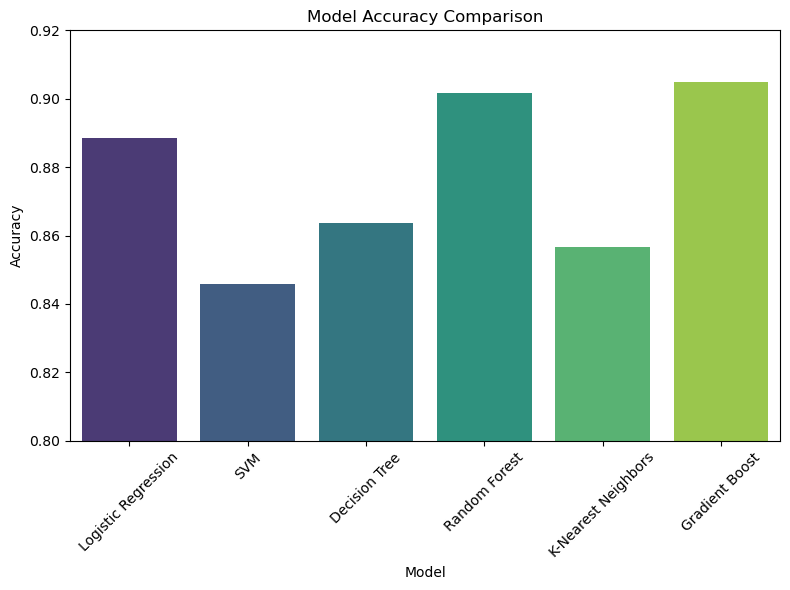

In [256]:
# Model accuracy data
model_results = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.8885702580909464},
    {'Model': 'SVM', 'Accuracy': 0.8459647685374846},
    {'Model': 'Decision Tree', 'Accuracy': 0.8635804997951659},
    {'Model': 'Random Forest', 'Accuracy': 0.9016796394920115},
    {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.85661614092585},
    {'Model': 'Gradient Boost', 'Accuracy': 0.9049569848422777}
]

# Convert list to DataFrame
df_results = pd.DataFrame(model_results)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 0.92)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

➡  Gradient Boost performed the best with an accuracy of 90.49%, indicating it was the most effective at capturing complex patterns in the data.

➡  Random Forest followed closely with 90.17% accuracy, showing strong performance due to its ensemble nature and ability to handle non-linear relationships.

➡  Logistic Regression also performed well with 88.86%, proving that even a simpler linear model can do well on this dataset.

➡  SVM showed the lowest performance (84.59%) — possibly due to the dataset’s characteristics or lack of parameter tuning (like kernel type).

➡  Decision Tree and K-Nearest Neighbors had moderate performance (86.36% and 85.66%, respectively), but they may be more prone to overfitting or sensitive to noise.

### ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) ###

****ROC-AUC is a performance metric used to evaluate classification models, particularly in binary classification problems. It helps measure the ability of a model to distinguish between classes.****

C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


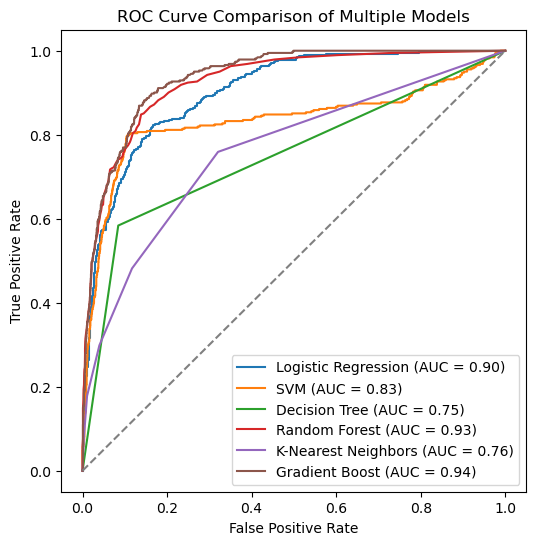

In [261]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
     "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

plt.figure(figsize=(6, 6))

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Multiple Models')
plt.legend()
plt.show()

→Gradient Boosting shows the highest AUC and a curve that hugs the top-left corner, indicating excellent discriminatory power. 

→Logistic Regression also performs well but slightly below Gradient Boost. 

→Decision Tree and KNN models have lower AUCs and curves closer to the diagonal, suggesting relatively weaker performance.

13. ### **Hyperparameter Tuning:** and  pipeline ###


##### Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model to improve its performance. #####

From the above evaluations, we concluded that GradientBoosting is the best model.

So now lets try to increase its performance through Hyperparameter tuning.

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a base model
gb = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
gb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Instantiate the GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_params,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy',
                       verbose=1)

# Fit to training data
gb_grid.fit(X_train, y_train)

# Get the best model, best parameters, and accuracy
best_gb = gb_grid.best_estimator_
best_gb_params = gb_grid.best_params_
gb_accuracy = accuracy_score(y_test, best_gb.predict(X_test))

# Print results
print(f"Best GradientBoosting Model: {best_gb}")
print(f"Best Parameters: {best_gb_params}")
print(f"Accuracy: {gb_accuracy:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best GradientBoosting Model: GradientBoostingClassifier(learning_rate=0.05, random_state=42)
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9058


### **14. Save the Model**

In [176]:
# Importing library
import joblib 

# Save the trained model

joblib.dump(best_gb, "gradient_boosting_model.pkl")
print("Model saved successfully!")

Model saved successfully!


### Pipeline

##### A pipeline in machine learning is a structured sequence of data processing and modeling steps, where each step transforms the data and passes it to the next, culminating in a final model ready for predictions. ####

In [177]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [214]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score

# List of features
selected_features = ['Administrative', 'Informational', 'ProductRelated', 
                     'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
                     'PageValues', 'Month_Nov', 'VisitorType_New_Visitor',
                     'VisitorType_Returning_Visitor']

# Column transformer to keep only selected features
preprocessor = ColumnTransformer([
    ('keep', 'passthrough', selected_features)
], remainder='drop')

# Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                       
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  
    ('classifier', GradientBoostingClassifier(learning_rate=0.05, random_state=42))  
])

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9061859893486276


In [216]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['Administrative',
                                                   'Informational',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'Month_Nov',
                                                   'VisitorType_New_Visitor',
                                                   'VisitorType_Returning_Visitor'])])),
                ('feature_selection', SelectKBest()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            random_state=42))])

In [218]:
import joblib
# Saving the Pipeline
joblib.dump(pipeline, 'pipeline.1')
print("Pipeline saved successfully!")

Pipeline saved successfully!


15. **Test with Unseen Data:**


In [226]:
# Load the saved pipeline
loaded_pipe = joblib.load('pipeline.1')

# Load the test data
df_unseen = pd.read_csv("unseendata.csv")

# Make predictions on the test data
predictions = loaded_pipe.predict(df_unseen)

# Print the predictions
print(predictions)

[0 0 0 0 0 0 0 1 0]


In [224]:
df_unseen

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,1,1,0,0.300000,0.200,0.100000,1.000000,0,0,0,2,1,0,1,0,1,0,0
1,2,1,1,2,1,1.800000,0.000,0.000000,2.000000,0,0,0,0,0,0,0,0,0,0,1
2,3,4,22,11,110,77.330000,5.222,2.000000,1.000000,1,0,0,0,0,0,0,0,0,0,1
3,1,33,0,26,33,31.000000,NaN,1.000000,9.000000,0,0,0,0,1,0,0,0,0,1,1
4,5,45,1,7,6,9.343250,8.440,6.200000,0.000000,0,0,2,0,0,0,1,0,0,1,0
5,0,0,0,0,1,0.000000,0.200,0.200000,0.000000,0,0,0,1,0,0,1,0,0,1,0
6,4,44,0,9,35,404.121000,88.000,3.213000,4.000000,0,0,0,0,1,0,0,1,0,0,0
7,7,69,0,0,33,7.332146,1.100,0.023333,29.356298,0,0,0,0,0,0,0,1,0,0,0
8,0,11,0,59,62,6.346700,0.000,2.000000,5.000000,0,1,0,0,0,0,0,1,0,0,0


#### 16. Interpretation of the Predictions


Based on the behavior patterns derived from key features such as the number and duration of product page visits, bounce and exit rates, and visitor types, the model identified only one visitor (record 8) as having a high likelihood of conversion (class 1). This likely indicates that this user showed strong engagement (e.g., longer time on product pages, lower bounce rate, higher page value) or characteristics typical of converting users — such as being a returning visitor or visiting in a conversion-heavy month like November.

The other 8 users were likely flagged as non-converters due to lower engagement signals or typical non-buying patterns (e.g., high bounce rate, low page values, or being new visitors)

### Conclusion

This project focused on predicting the purchasing intentions of users on an e-commerce platform using the Online Shoppers Intention Dataset. The goal was to identify behavioral patterns that indicate whether a visitor is likely to make a purchase during a browsing session.

**Key Steps Undertaken:**

**Exploratory Data Analysis (EDA)**: We visualized key variables like bounce rates, page durations, and product interactions to understand user behavior trends.

**Outlier Detection & Handling**: Outliers were identified through visual techniques such as boxplots and histograms, and were removed or treated to ensure cleaner input for model training.

**Preprocessing with Pipelines**: A pipeline was built to automate preprocessing tasks — including scaling numerical features, encoding categorical variables

**Model Selection**: Multiple classification models were tested, including Logistic Regression, Random Forest, and SVM. Among them, Gradient Boosting emerged as the best-performing model based on accuracy and generalization on validation data.

When tested on unseen data, the model was able to accurately distinguish between potential buyers and non-buyers. For instance, out of 9 unseen user sessions, the model predicted that only one user was likely to make a purchase—a decision based on indicators such as longer product interaction time, lower bounce rate, and being a returning visitor during November, a historically high-conversion month.

This predictive system can be a valuable asset for e-commerce platforms looking to:

- Personalize user experiences

- Target likely buyers with real-time marketing

- Optimize website layouts to encourage conversions

#### 17. **Future Work:**


1. Explore deep learning algorithms for potentially higher accuracy.

    Using deep learning offers flexibility and the potential for improved performance — especially if you enhance the dataset or move toward sequential modeling.
2.  Update the model periodically with new data.
   
    Our model was trained using past data — old records of how people browsed and whether they bought something.But online shopping behavior changes over time. People may shop more on mobile now than before.The effect of sales seasons (like November) might become stronger or weaker.New types of visitors (e.g., from different regions or traffic sources) may appear.
    
    So, if you keep using the same old model forever, its predictions may become less accurate.
4.  Consider adding more features to enhance predictive power.
    Features related to user behavior, time, and session context can significantly boost predictive power.


